### (Not-) ETAS: Yellowstone 2017, General Purpose

#### Aftershock Scalint Type Estimated Seismicity Field


In [1]:
#
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import datetime as dtm
import matplotlib.dates as mpd
import pytz
tzutc = pytz.timezone('UTC')

#import operator
import math
import random
import numpy
import scipy
import scipy.optimize as spo
from scipy import interpolate
import itertools
import sys
#import scipy.optimize as spo
import os
import operator
#from PIL import Image as ipp
import multiprocessing as mpp
#
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import json
import pickle
#

import geopy.distance
#from geopy.distance import vincenty
#from geopy.distance import great_circle
#
#import shapely.geometry as sgp
#
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from geographiclib.geodesic import Geodesic as ggp
#

#import ANSStools as atp
from yodiipy import ANSStools as atp
#

import contours2kml
import globalETAS as gep

import global_etas_auto as ggep

from eq_params import *
#
from nepal_figs import *
import optimizers
#
import random
import geopy

failed while loading urllib and/or urllib. maybe python 3.x?
comcat not available. consider installing comcat for improved catalog operations; see https://github.com/usgs/libcomcat


In [3]:
# event was some time on the 24th or maybe late the 23rd. this, plus defaults, should find the event:
#to_dt = dtm.datetime(2016,8,25, tzinfo=pytz.timezone('UTC'))
to_dt = dtm.datetime.now(pytz.timezone('UTC'))
#
Lr_factor = 10.
# define these from the t_now in the actual etas object, in the event that we load it from pickle,
#  rather than calc it here.
#f_path = '/home/myoder/Dropbox/Research/etas/italy_2016_10/etas_{}'.format(to_dt)
#f_root = 'etas_2016'
#

t0 = dtm.datetime.now(pytz.timezone('UTC'))
t_ms = t0
to_dt
#
# sacramento:
lat0 = 44.4280
lon0 = -110.4885
#ll_sacramento = (lon0, lat0)

#m0 = 7.8

d_lat=6.
d_lon=6.
#
lats = [lat0-d_lat, lat0+d_lat]
lons = [lon0-d_lon, lon0+d_lon]
#to_dt = t0-dtm.timedelta(hours=2)
#to_dt = dtm.datetime.now(pytz.utc)
#
#etas = ggep.auto_etas(to_dt=to_dt, Lr_factor=Lr_factor, dt_0=5)
#italy_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':to_dt, 
#                'lats': [42.,43.5], 'p': 1.1, 'b1': 1.0, 'mc': 2.5, 'q': 1.5,
#                'lons': [12.,15.], 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76}

# eq_prams = {'do_recarray': True, 'D_fract': 1.5,
#                't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
#                't_now':None, 
#                'lats': lats, 'p_cat': 1.1, 'b1': 1.0, 'mc': 1., 'q_cat': 1.5,
#                'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
#                'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76, 'etas_range_padding':1.5,
#             'etas_range_factor':30.0, 'ab_ratio_expon':.25 }

eq_prams = {'do_recarray': True, 'D_fract': 1.5,
               't_0':dtm.datetime(1990, 1, 1, 0, 0, tzinfo=pytz.timezone('UTC')),
               't_now':to_dt, 'cat_len':3650,
               'lats': lats, 'p': 1.1, 'b1': 1.0, 'mc': 1.5, 'q': 1.5,
               'lons': lons, 'dmstar': 1.0, 'b2': 1.5, 'd_tau': 2.28,
               'incat': None, 'fit_factor': 2.0, 'd_lambda': 1.76,
            'etas_range_factor':30, 'etas_range_padding':1.5, 'ab_ratio_expon':.5 }

eq_prams.update({'mc':2.0, 'd_lat':.25, 'd_lon':.25})
# 't_now':dtm.datetime(2017,6,16, tzinfo=pytz.timezone('UTC'))
#  'cat_len':365*10.,

In [4]:
# let's add a preliminary map...
class Preliminary_Map(object):
    def __init__(self, lats, lons):
        pass

In [5]:
n_cpu = 2
incat = None
incat = gep.make_ETAS_catalog_mpp(atp.ANSS_Comcat_catalog(min_lon=lons[0], max_lon=lons[1], min_lat=lats[0], max_lat=lats[1],
                                m_c = eq_prams['mc'], from_date=t0-dtm.timedelta(days=4000),
                                to_date=to_dt, Nmax=None).as_recarray(), n_cpu=n_cpu )

etas_prams:  {'incat': None, 'lats': [32.0, 38.0], 'lons': [-117.0, -114.0], 'mc': 2.5, 'date_range': ['1990-1-1', None], 'D_fract': 1.5, 'd_lambda': 1.76, 'd_tau': 2.28, 'fit_factor': 1.5, 'p': 1.1, 'q': 1.5, 'dmstar': 1.0, 'b1': 1.0, 'b2': 1.5, 'do_recarray': False}
results fetched.


In [6]:
#n_cpu = 2*mpp.cpu_count()

#n_cpu=5
etas = gep.ETAS_mpp(n_cpu=n_cpu, catalog=incat, **eq_prams)
#
# we've run this; we can reload it from pickle:
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas = pickle.load(fin)
#

event_name = 'YellowStone2017'
f_path = '{}/Dropbox/Research/etas/{}/etas_{}'.format(os.environ['HOME'], event_name,etas.t_now)
f_root = 'etas_{}'.format(event_name)

begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:23:56.733473+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 8095], None)
make_etas():
etas_mpp worker xyz_range:  [0, 1152]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:23:56.733473+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 8095], [0, 1152])
etas_mpp worker xyz_range:  [1152, 2304]
begin globalETAS.__init()__
Overriding t_0 (etas catalog start date/time) for ETAS calculations. using catalog start, t_0 = t_now - catlen (3650.000000) = 2011-02-19 22:23:56.733473+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 8095], [1152, 2304])
begin make_etas_rtree()
** len(self.ETAS_array)[168745] = 1152
begin make_etas_rtree()
** len(self.ETAS_array)[168748] = 1152
Indices initiated. begin ETAS[168745] ::

/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:1383: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "omori_rate" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/yoder/Dropbox/Research/globalETAS/globalETAS.py (1401)

File "globalETAS.py", line 1401:
	def omori_rate(self, t=None, t_to=None, p=None):
     <source elided>
		#print("inputs: ", t, lon, lat, p, q)
		t = (t or mpd.date2num(dtm.datetime.now(pytz.timezone('UTC'))))
  ^

  @numba.jit
/home/yoder/Dropbox/Research/globalETAS/globalETAS.py:1383: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "omori_rate" failed type inference due to: non-precise type pyobject
During: typing of argument at /home/yoder/Dropbox/Research/globalETAS/globalETAS.py (1401)

File "globalETAS.py", line 1401:
	def omori_rate(self, t=None, t_to=None, p=None):
     <source elided>
		#print("inputs: ", t, lo

[168748]: finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 8095])
[168745]: finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 8095])
ETAS complete.


In [ ]:
#print(etas.t0, etas.t_now, etas.t_forecast, etas.catalog[-1])

ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

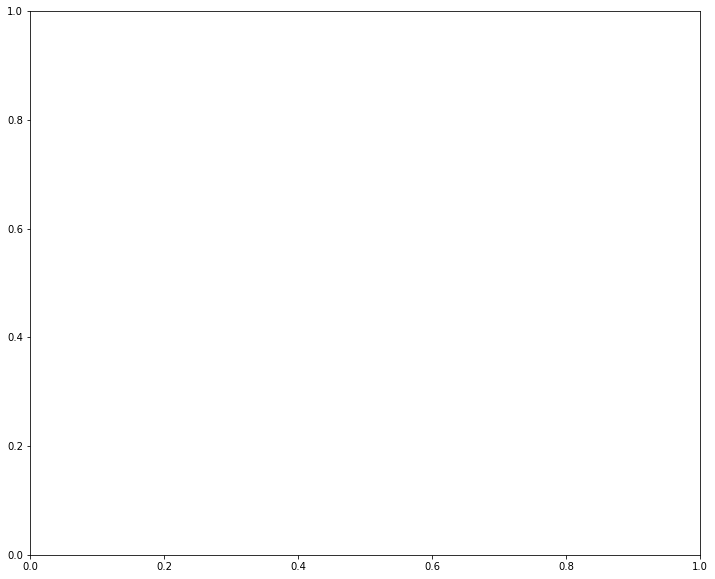

In [8]:
fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)


ValueError: 'vertices' must be 2D with shape (M, 2). Your input has shape (0,).

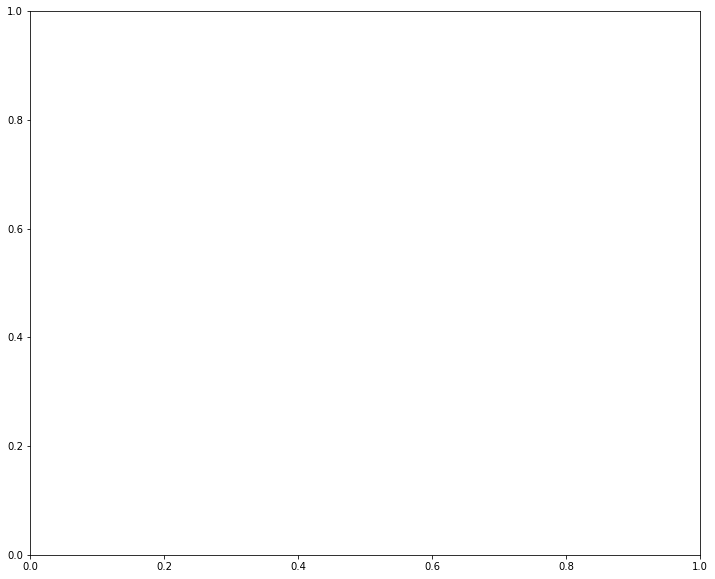

In [7]:

fg=plt.figure(0, figsize=(12,10))
ax=plt.gca()
etas.make_etas_contour_map(n_contours=25, fignum=0, map_resolution='f', alpha=.3, ax=ax)
#
#mainshock = sorted(etas.catalog, key=lambda rw: rw['mag'])[-1]
#print('mainshock: ', mainshock)
# get mainshock. it's an m>6 event in the last week or so... this is subjective.
# if we just look for the biggest event, we get the L'Aquila event, so we'll need to be more creative...
# or just specify it.

mainshock = etas.catalog[-1]
for j,eq in enumerate(reversed(etas.catalog)):
    #print('*** ', pytz.utc.localize(eq['event_date'].astype(dtm.datetime)))
    if pytz.utc.localize(eq['event_date'].astype(dtm.datetime))<etas.t_now-dtm.timedelta(days=180): break
    if eq['mag']>mainshock['mag']:
        mainshock = eq
        #
    #
#
print('ms: ', mainshock, mainshock['lon'], mainshock['lat'])
x,y = etas.cm(mainshock['lon'], mainshock['lat'])
#
#print('mm: ', max(etas.catalog['mag']))
#
# let's get everything m>6 in the last 6 months?
#m6s = [rw for rw in etas.catalog if rw['mag'] >= 5.5 
#       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=180)]
m6s = [rw for rw in etas.catalog if rw['mag'] >= 3.5 
       and pytz.utc.localize(rw['event_date'].astype(dtm.datetime))>to_dt-dtm.timedelta(days=5)]

#
# plot mainshock:
dt = mainshock['event_date'].astype(dtm.datetime)
dt=t0
dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
#etas.cm.plot([x], [y], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(mainshock['mag'], dt_str))
#etas.cm.plot([lon0], [lat0], latlon=False, marker='*', color='r', ms=16, zorder=11,
#                   label='m={}, {}'.format(m0, dt_str))

ax.set_title('ETAS: {}, {}\n\n'.format(event_name, etas.t_now), size=16)
for j,m6 in enumerate(m6s):
    clr = colors_[j%len(colors_)]
    #
    dt = m6['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    etas.cm.scatter(m6['lon'], m6['lat'], s=3*(m6['mag']+12.), edgecolors=clr, 
                          c='none', marker='o', zorder=11, label='m={}, {}'.format(m6['mag'], dt_str))

#x,y = etas.cm(*ll_sacramento)
#etas.cm.scatter([x],[y], marker='o', s=18, edgecolors='r', c='r',
#                    label='Sacramento')
t_cat = mpd.date2num(etas.t_now-dtm.timedelta(days=15))
print('tt: ', t_cat, etas.catalog['event_date'][0], type(etas.catalog['event_date'][0]))
k=0
for j,rw in enumerate(etas.catalog):
    if mpd.date2num(rw['event_date'].astype(dtm.datetime))<t_cat: continue
    if rw['mag']<5.: continue
    k+=1
    clr = colors_[k%len(colors_)]
    #
    dt = rw['event_date'].astype(dtm.datetime)
    dt_str = '{}-{}-{} {}:{}:{}'.format(dt.year, dt.month, dt.day, dt.hour, dt.minute, dt.second)
    #etas.cm.scatter(rw['lon'],rw['lat'], s=3*(rw['mag']+12.), edgecolors=clr, 
    #                      c='none', marker='o', zorder=11, label='m={}, {}'.format(rw['mag'], dt_str))
    etas.cm.plot(rw['lon'],rw['lat'], ms=1.*(rw['mag']+2.), color=clr, 
                          marker='o', zorder=11, label='m={}, {}'.format(rw['mag'], dt_str), latlon=True)
    
    #
etas.cm.plot(etas.catalog['lon'], etas.catalog['lat'], ',', color='b', alpha=.2, zorder=4)

plt.gca().legend()
#print(etas.catalog[-10:])

In [ ]:
print(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5])
len(['{},{}\n'.format(rw['event_date'], rw['mag'] ) for rw in etas.catalog if rw['mag'] >= 5.5
     and rw['event_date'].astype(dtm.datetime)>dtm.datetime(2016,10,20)])



In [ ]:
## hey, pickling works with the new ETAS objects (or at least it appears to...):
# with open('data/etas_201610.pkl', 'wb') as fpkl:
#     pickle.dump( etas, fpkl)    
#
#with open('data/etas_201610.pkl', 'rb') as fin:
#    etas2 = pickle.load(fin)
#
#print(etas2.catalog[0:5])
# TODO: we want the datetime part of the filename to come from the etas object itself, for purposes of
# integrity. BUT, we want this script to be a bit more portable, so we should replace all the etas
# references/object name to just 'etas'
#
etas.export_kml(os.path.join(f_path, '{}_{}.kml'.format(f_root, str(etas.t_now).replace(' ', '_'))))
etas.export_xyz(os.path.join(f_path, '{}_{}.xyz'.format(f_root, str(etas.t_now).replace(' ', '_'))))
fg.savefig(os.path.join(f_path, '{}_{}.png'.format(f_root, str(etas.t_now).replace(' ', '_'))))
#
# so this worked, once upon a time, but breaks maybe when the script does not run cleanly all the way through?
#with open (os.path.join(f_path, '{}_{}.pkl'.format(f_root, str(etas.t_now).replace(' ', '_'))), 'wb') as fpkl:
#    pickle.dump(etas, fpkl)


In [ ]:
plt.figure(figsize=(8,5))
plt.clf()
ax1=plt.subplot('121')
ax2=plt.subplot('122')
ax1.plot(etas.catalog['lon'], etas.catalog['lat'], ',')
ax1.plot([mainshock['lon']], [mainshock['lat']], marker='*', color='r', ms=16, zorder=11)
#
ax2.plot([m for m in reversed(sorted(etas.catalog['mag']))], numpy.arange(1,len(etas.catalog)+1),
         '.-', lw=2.)
ax2.set_yscale('log')

In [ ]:
#print(etas.mc, etas.mc_etas)

In [ ]:
# plot a cross-section of ETAS. let's get smart about this and do a PCA on the xyz field...
#
#plt.figure()
##my_xy = [[x,y,z] for x,y in zip(etas.catalog['lon'], etas['lat']) if x>=42.25 and x<=42.75]
#my_xyz = [[x,y,z] for x,y,z in etas.ETAS_array if y>=42.25 and y<=42.75]
#plt.figure(figsize=(8,6))
#plt.plot([x for x,y,z in my_xyz ], [z for x,y,z in my_xyz], '.')

In [ ]:
mycat = atp.catfromANSS(lon=lons, lat=lats, minMag=2.5,
                        dates0=[dtm.datetime(2005,1,1, tzinfo=tzutc), None], Nmax=None, fout=None, rec_array=True)


In [ ]:
print(mycat.dtype)

### Temporal rate assessment
- How well does this predict the rate of earthquakes?
- Since we have not yet merged JMW's Omori integration update, we can only work from the instantaneous rate.
- Compute this by averaging over the entire map and compare to a simple count.

In [ ]:
mc=2.5
deg2km = gep.deg2km
deg2rad = gep.deg2rad
total_rate = numpy.sum([z*etas.d_lat*etas.d_lon*numpy.cos(y*deg2rad)*deg2km**2 for x,y,z in etas.ETAS_array])

total_rate2 = numpy.sum([z*numpy.cos(y*deg2rad) 
            for x,y,z in etas.ETAS_array])*etas.d_lon*etas.d_lat*(deg2km**2)*(10**(etas.mc_etas - mc))*.1#10**(etas.mc_etas - mc)
#tr3 = etas.total_rate(mc=None)

In [ ]:
print(total_rate*3600.*24, etas.mc_etas)
print(total_rate2*3600.*24, etas.mc_etas)

In [ ]:
rate_empirical = 0
n_days = 2
dt0 = etas.catalog['event_date'][-1].astype(dtm.datetime)-dtm.timedelta(days=n_days)
for rw in reversed(etas.catalog['event_date']):
    if rw.astype(dtm.datetime)<dt0: break
    rate_empirical += 1
    #
#
rate_empirical/=n_days
print('empirical rate: {}'.format(rate_empirical))

In [ ]:
print(etas.catalog['event_date'][-1], type(etas.catalog['event_date'][0]))

In [ ]:
print(len(etas.catalog))